In [90]:
import numpy as np
from sklearn.datasets import load_iris


iris = load_iris()
print iris.data[:5]
print iris.feature_names

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [2]:
print iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
print iris.target_names

['setosa' 'versicolor' 'virginica']


In [4]:
print type(iris.data)
print type(iris.target)
print type(iris.target_names)
print type(iris.feature_names)
print iris.data.shape
print iris.target.shape

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'list'>
(150L, 4L)
(150L,)


In [5]:
X = iris.data
y=iris.target

In [6]:
X[1:6,]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X[:,2],X[:,3],s=X[:,1],c=y)
#plt.scatter(range(3),range(3))

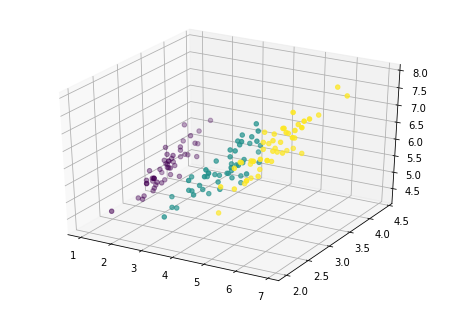

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,2],X[:,1],X[:,0],c=y)
plt.show()

In [9]:
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(X,y)
print knn.predict([ [3,5,2,3] ])
y_pred = knn.predict (X)
print metrics.accuracy_score(y,y_pred)


[0]
1.0


In [10]:
knn5 = KNeighborsClassifier(n_neighbors =5)
knn5.fit(X,y)
#knn.predict([ [3,5,2,3] ])
y_pred = knn5.predict (X)
print metrics.accuracy_score(y,y_pred)

0.9666666666666667


In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict (X)
print metrics.accuracy_score(y,y_pred)

0.96


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4)

knn1 = KNeighborsClassifier(n_neighbors =1)
knn1.fit(X_train,y_train)
y_pred = knn1.predict (X_test)
print metrics.accuracy_score(y_test,y_pred)


0.95


In [13]:
logreg1 = LogisticRegression()
logreg1.fit(X_train,y_train)
y_pred = logreg1.predict (X_test)
print metrics.accuracy_score(y_test,y_pred)

0.95


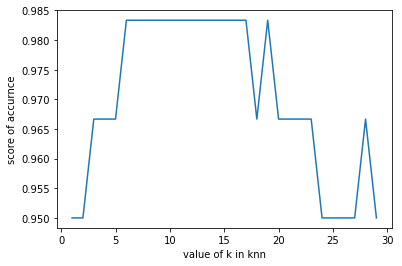

In [14]:
k_range = range(1,30)
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict (X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
%matplotlib inline

plt.plot(k_range,scores)
plt.xlabel('value of k in knn')
plt.ylabel('score of accurnce')
plt.show()

**pandas lessos start here**

In [15]:
import pandas as pd
data =pd.read_csv('./Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


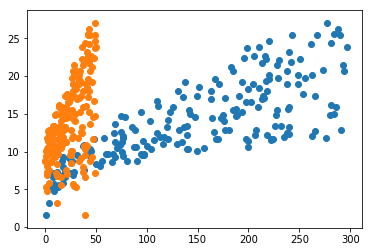

In [17]:
plt.scatter('TV','sales',data=data)
plt.scatter('radio','sales',data=data)
plt.show()

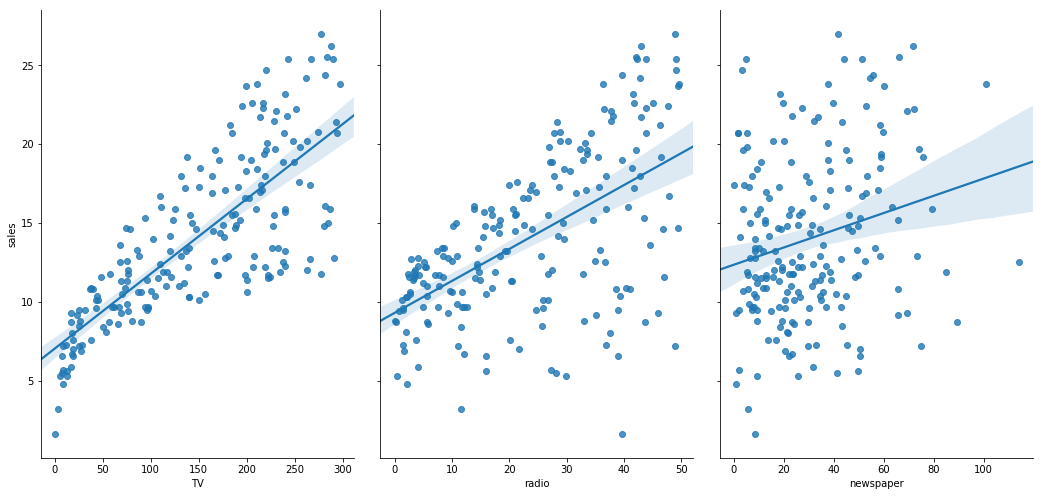

In [18]:
import seaborn as sns
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars ='sales', size=7,aspect=0.7,kind='reg')

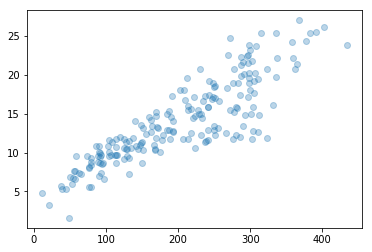

In [19]:
d = data.TV + data.radio + data.newspaper
plt.scatter(d,data.sales,alpha=0.3)

In [21]:
features= ['TV','radio','newspaper']
X=data[features]
y=data['sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4)
X_train.shape

(120, 3)

1.5881996223774348


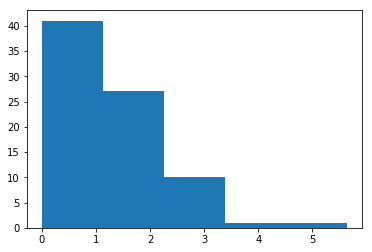

80
(80L,)


In [70]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train,y_train)
y_pred = linreg.predict (X_test)
print metrics.mean_squared_error(y_test.values,y_pred)**(0.5)

numtruths =[]
for i in range(y_pred.size):
    truth =  y_pred[i] - y_test.values[i]
    truth = (truth*truth)**(0.5)    
    if truth > 0.0001:
        numtruths.append(truth)


plt.hist(numtruths,bins=5)
plt.show()
    
print y_pred.size
print y_test.values.shape


In [104]:
from sklearn.cross_validation import KFold
kf = KFold(32,n_folds=6, shuffle =False)
for i,j in enumerate(kf):
    print str(i) + "-" +str(j[0])+ "--" +str(j[1])

0-[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31]--[0 1 2 3 4 5]
1-[ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31]--[ 6  7  8  9 10 11]
2-[ 0  1  2  3  4  5  6  7  8  9 10 11 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31]--[12 13 14 15 16]
3-[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 22 23 24 25 26 27 28
 29 30 31]--[17 18 19 20 21]
4-[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 27 28
 29 30 31]--[22 23 24 25 26]
5-[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]--[27 28 29 30 31]


In [103]:
a= np.array([[3,4,5],[3,5,6]])
for i,j in enumerate(a):
    print str(i) +"---"+str(j)

d = [[11, 22],[3, 4]]
df = pd.DataFrame(data=d)
for i in df[0]:
    print str(i) #+"---"+str(j)
df

0---[3 4 5]
1---[3 5 6]
11
3


,0,1
0,11,22
1,3,4


In [136]:
from sklearn.cross_validation import cross_val_score

X = iris.data
y=iris.target
k_range = range(1,31)
k_scores =[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

#plt.plot(k_range,k_scores)
#plt.xlabel('value k neighbors')
#plt.show()

from sklearn.model_selection import GridSearchCV
#param_grid = dict(n_neighbors = k_range)
param_grid = {'n_neighbors': k_range}
grid = GridSearchCV(knn,param_grid,cv=10,scoring="accuracy",return_train_score=True)
grid.fit(X,y)
#to be removed in .20
grid.grid_scores_

C:\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [137]:
#grid.cv_results_ #not depracted

{'mean_fit_time': array([1.99985504e-04, 9.99927521e-05, 3.99994850e-04, 2.00009346e-04,
        2.00009346e-04, 3.99994850e-04, 3.00002098e-04, 5.99980354e-04,
        3.99971008e-04, 2.99978256e-04, 0.00000000e+00, 2.99978256e-04,
        1.99985504e-04, 2.99978256e-04, 3.00025940e-04, 3.00002098e-04,
        3.99994850e-04, 3.00002098e-04, 3.00002098e-04, 1.00016594e-04,
        3.00025940e-04, 0.00000000e+00, 3.99994850e-04, 3.00002098e-04,
        3.99971008e-04, 1.99985504e-04, 1.99985504e-04, 9.99927521e-05,
        6.00028038e-04, 1.99985504e-04]),
 'mean_score_time': array([0.00050001, 0.0007    , 0.0006    , 0.00049996, 0.00050001,
        0.00050004, 0.00040002, 0.00039997, 0.00059996, 0.00050001,
        0.0006    , 0.0006    , 0.00049999, 0.00050004, 0.00059998,
        0.00049999, 0.00039999, 0.00060003, 0.00050001, 0.00060003,
        0.00059996, 0.00079999, 0.00050006, 0.00039999, 0.00050006,
        0.00049999, 0.00079997, 0.00080006, 0.00029998, 0.00079997]),
 'mean_t

0.9800000000000001
0.9533333333333334


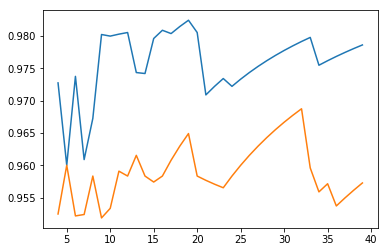

In [116]:
knn = KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()

logreg = LogisticRegression()
print cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean()

resultsk=[]
resultsl=[]

r= range(4,40)

for i in r:
    knn = KNeighborsClassifier(n_neighbors=20)
    resultsk.append(cross_val_score(knn,X,y,cv=i,scoring='accuracy').mean())
    
    logreg = LogisticRegression()
    resultsl.append(cross_val_score(logreg,X,y,cv=i,scoring='accuracy').mean())
    
plt.plot(r,resultsk)
plt.plot(r, resultsl)
plt.show()

In [126]:
data =pd.read_csv('./Advertising.csv',index_col=0)
feature_cols = ['TV','radio','newspaper']
X= data[feature_cols]
y= data.sales
linreg = LinearRegression()
print cross_val_score(linreg,X,y,cv=10,scoring='neg_mean_squared_error').mean()



-3.059967618118513
